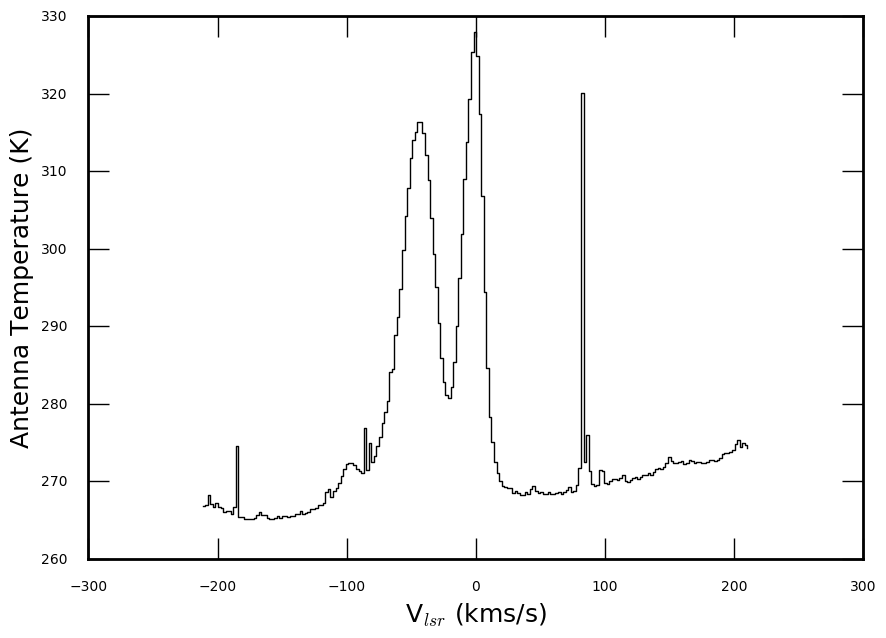

In [1]:
import astropy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
import math

%matplotlib inline

data = ascii.read("tobin-g110-reduced.dat")

#print data
#print data['Name','Tbol']

#print data['Lbol','Tbol']

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#ax.set_xlim(0,71.0)
#ax.set_ylim(-5,5)

lin1=ax.plot(data['vel'],data['Tant'],color='black',linestyle='steps')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#            label.set_fontproperties(ticks_font)
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_ylabel('Antenna Temperature (K)', fontsize=18)
ax.set_xlabel('V$_{lsr}$ (kms/s)', fontsize=18)


270.5515 275.96253


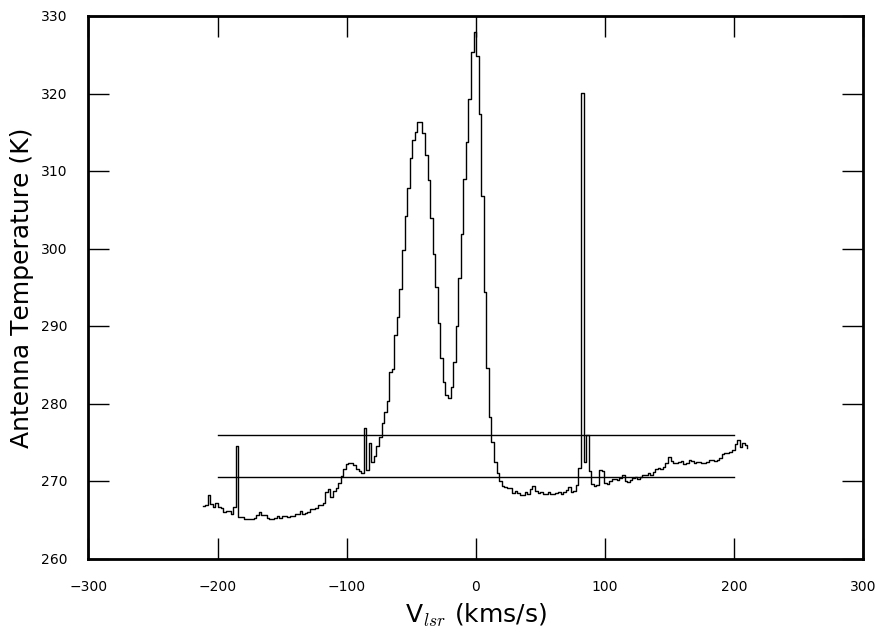

In [2]:
baseline_med=np.median(data['Tant'])-0.5
baseline_ul=baseline_med+baseline_med*0.02

print(baseline_med, baseline_ul)
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#ax.set_xlim(0,71.0)
#ax.set_ylim(-5,5)

lin1=ax.plot(data['vel'],data['Tant'],color='black',linestyle='steps')
lin2=ax.plot([-200,200],[baseline_med,baseline_med],color='black',linestyle='steps')
lin3=ax.plot([-200,200],[baseline_ul,baseline_ul],color='black',linestyle='steps')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#            label.set_fontproperties(ticks_font)
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_ylabel('Antenna Temperature (K)', fontsize=18)
ax.set_xlabel('V$_{lsr}$ (kms/s)', fontsize=18)



[167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213   0   1   2   3   4   5   6
   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80]


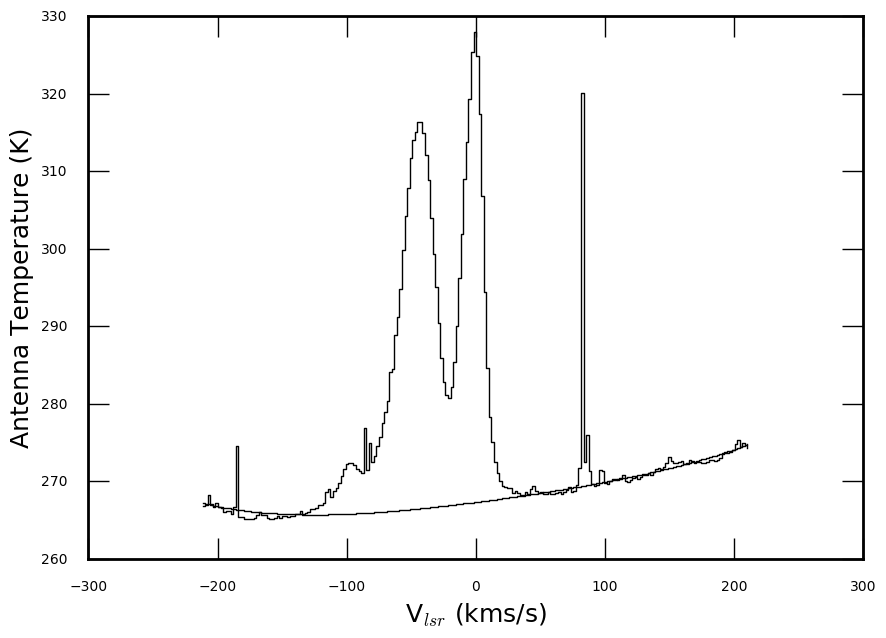

In [10]:
mask1=np.where((data['vel'] > -250.0) & (data['vel'] < -120))
mask2=np.where((data['vel'] > 100.0 ) & (data['vel'] < 240.0))
mask3=np.where((data['vel'] > 50.0 ) & (data['vel'] < 80.0))

mask=np.append(mask1,mask2)
mask=np.append(mask,mask3)

print(mask)
fit = np.polyfit(data['vel'][mask],data['Tant'][mask],4)
fit_fn = np.poly1d(fit) 
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#ax.set_xlim(0,71.0)
#ax.set_ylim(-5,5)

lin1=ax.plot(data['vel'],data['Tant'],color='black',linestyle='steps')
lin2=ax.plot(data['vel'],fit_fn(data['vel']),color='black',linestyle='steps')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#            label.set_fontproperties(ticks_font)
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_ylabel('Antenna Temperature (K)', fontsize=18)
ax.set_xlabel('V$_{lsr}$ (kms/s)', fontsize=18)


RMS Noise:  0.933688588855 K


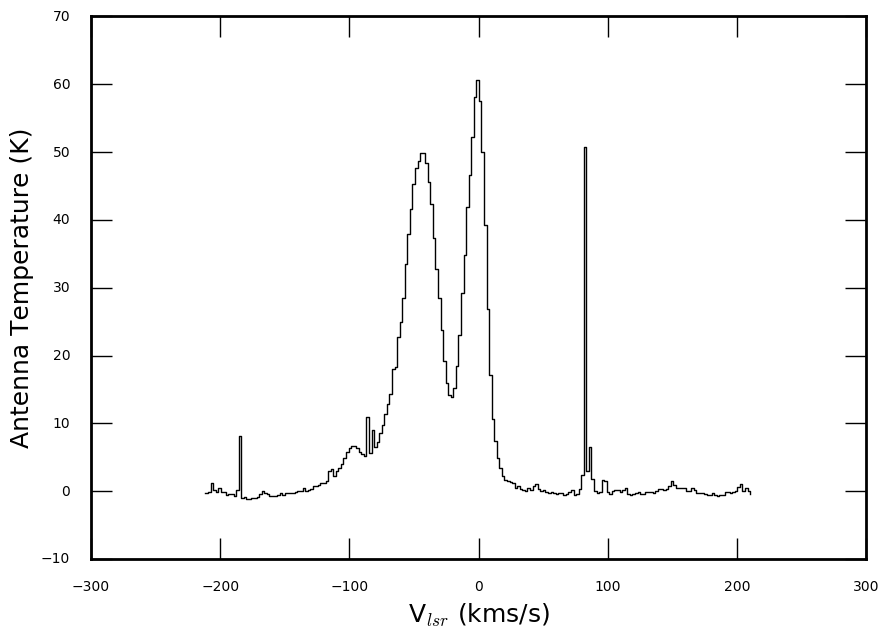

In [11]:
spectra_blcorr=data['Tant'].copy()
spectra_blcorr=data['Tant']-fit_fn(data['vel'])

rms=np.std(spectra_blcorr[mask])
print('RMS Noise: ',rms, 'K')
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#ax.set_xlim(0,71.0)
#ax.set_ylim(-5,5)

lin1=ax.plot(data['vel'],spectra_blcorr,color='black',linestyle='steps')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#            label.set_fontproperties(ticks_font)
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_ylabel('Antenna Temperature (K)', fontsize=18)
ax.set_xlabel('V$_{lsr}$ (kms/s)', fontsize=18)


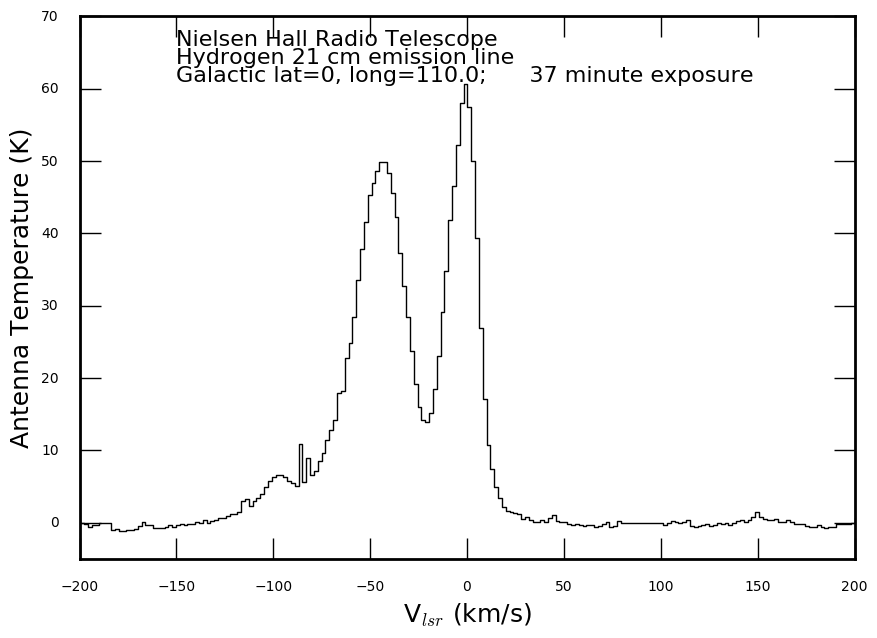

In [21]:
rfi_mask=np.where((data['vel'] > 79.0) & (data['vel'] < 99.0))
spectra_blcorr[rfi_mask]=0.0

rfi_mask=np.where((data['vel'] > -190.0) & (data['vel'] < -185.0))
spectra_blcorr[rfi_mask]=0.0
#rfi_mask=np.where((data['vel'] > -50.0) & (data['vel'] < -48))
#chanrfi=int(rfi_mask[0])
#spectra_blcorr[rfi_mask]=(spectra_blcorr[chanrfi+1]+spectra_blcorr[chanrfi-1])/2.0


#velocity_mask1=(data['vel'] > 0).nonzero()
#velocity_mask2=(data['vel'] < 60).nonzero()
#print(velocity_mask)
#print(velocity_mask1,velocity_mask2)


fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(-200,200)
ax.set_ylim(-5,70)

lin1=ax.plot(data['vel'],spectra_blcorr,color='black',linestyle='steps')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#            label.set_fontproperties(ticks_font)
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_ylabel('Antenna Temperature (K)', fontsize=18)
ax.set_xlabel('V$_{lsr}$ (km/s)', fontsize=18)
ax.text(-150,66.0, 'Nielsen Hall Radio Telescope',fontsize=16)
ax.text(-150,63.5, 'Hydrogen 21 cm emission line',fontsize=16)
ax.text(-150,61.0, 'Galactic lat=0, long=110.0;      37 minute exposure',fontsize=16)
fig.savefig('G110-long.pdf')


3105.27581943 +/- 17.3657822197 K km/s


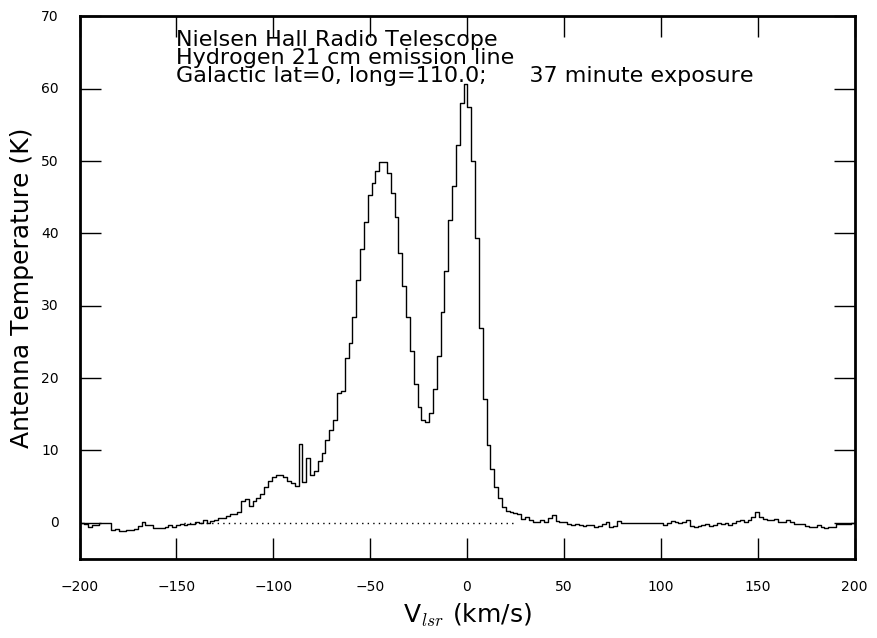

In [24]:
intensity_mask=np.where((data['vel'] > -150.0) & (data['vel'] < 25.0))

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(-200,200)
ax.set_ylim(-5,70)

lin1=ax.plot(data['vel'],spectra_blcorr,color='black',linestyle='steps')
lin2=ax.plot(data['vel'][intensity_mask],np.zeros(len(data['vel'][intensity_mask])),color='black',linestyle='dotted')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#            label.set_fontproperties(ticks_font)
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_ylabel('Antenna Temperature (K)', fontsize=18)
ax.set_xlabel('V$_{lsr}$ (km/s)', fontsize=18)
ax.text(-150,66.0, 'Nielsen Hall Radio Telescope',fontsize=16)
ax.text(-150,63.5, 'Hydrogen 21 cm emission line',fontsize=16)
ax.text(-150,61.0, 'Galactic lat=0, long=110.0;      37 minute exposure',fontsize=16)

intensity=np.sum(spectra_blcorr[intensity_mask])
chanwidth=data['vel'][0]-data['vel'][1]
#print(len(intensity_mask[0]))
intensity_rms=rms*chanwidth*(float(len(intensity_mask[0])))**0.5
print((intensity)*chanwidth, '+/-',intensity_rms, 'K km/s')
